# Ford GoBike System Data
## by Mohamed Ateya

## Investigation Overview

The goal of our investigation is to explore the data and to answer these questions:
- How the duration of the trips diverse?
- When are most trips were taken in terms of the time of day, day of the week, or month of the year?
- Does the above depend on if a user is a subscriber or customer?
- How does the type of the users affect the other features?

## Dataset Overview

This data set includes information about individual rides madein a bike-sharing system covering the greater San FranciscoBay area

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('cleaned.csv')

## (Visualization 1)

> First of first, we need to take a look at the distribution of the trips duration time.

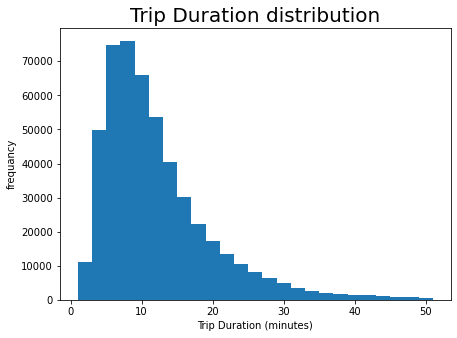

In [3]:
plt.figure(figsize = (7,5) )
bins = np.arange(1, df['duration_mints'].max()+2,2)
plt.hist(data = df, x ='duration_mints', bins =bins)
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('frequancy')
plt.title('Trip Duration distribution', size = 20);

## (Visualization 2)

> The proportion of the Subscribers is very HIGH!

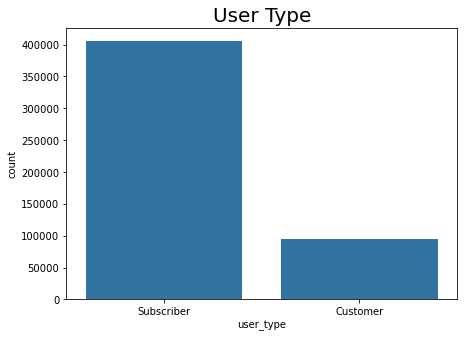

In [4]:
plt.figure(figsize =(7,5))
color = sb.color_palette()[0]
sb.countplot(data = df, x ='user_type', color = color);
plt.title('User Type', size =20);

## (Visualization 3)

>The trips distance distribution.

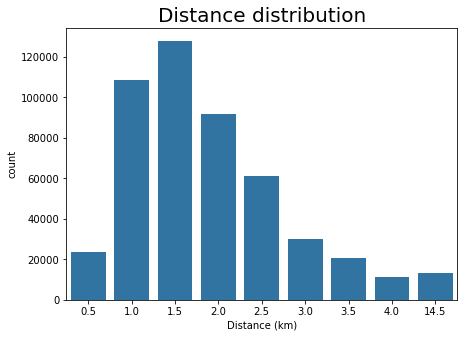

In [5]:
plt.figure(figsize =(7,5))
sb.countplot(data =df, x ='distance', color = color )
plt.title('Distance distribution', size =20);
plt.xlabel('Distance (km)');

## (Visualization 4)

>The trips start time over the day hours.

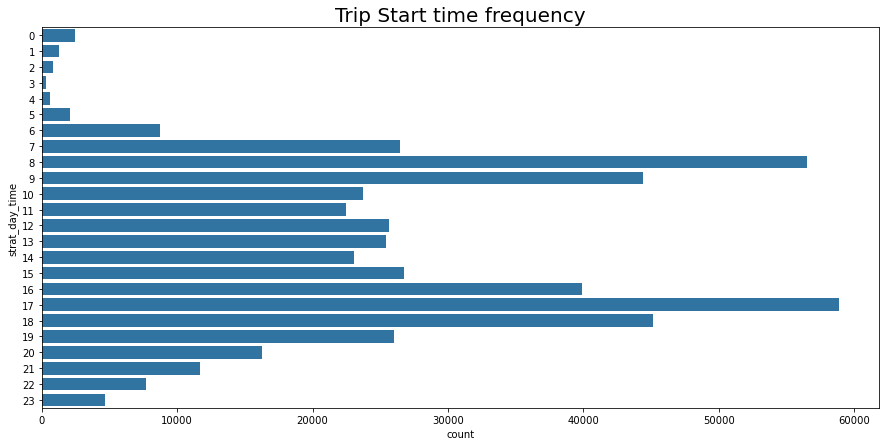

In [6]:
#to catigorical
time = np.arange(0,24) 
time = pd.api.types.CategoricalDtype(categories= time, ordered= True)
df.strat_day_time = df.strat_day_time.astype(time)

#ploting
plt.figure(figsize =(15,7))
sb.countplot(data =df, y = 'strat_day_time', color =color);
plt.title('Trip Start time frequency', size =20);

## (Visualization 5)

>The trips over the weekdays.

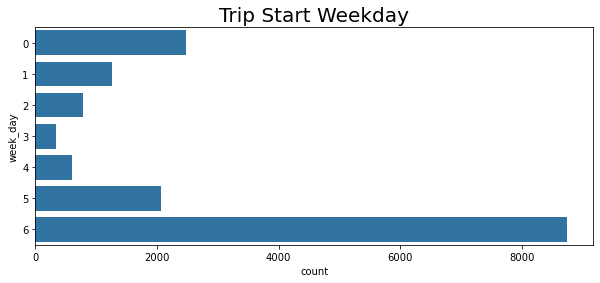

In [7]:
#week_day investigation

#to catigorical
time = np.arange(0,7) 
week_days = pd.api.types.CategoricalDtype(categories= time, ordered= True)
df.week_day = df.strat_day_time.astype(week_days)

#ploting
plt.figure(figsize =(10,4))
sb.countplot(data =df, y = 'week_day', color =color);
plt.title('Trip Start Weekday', size =20);

## (Visualization 6)

> The trips over months.

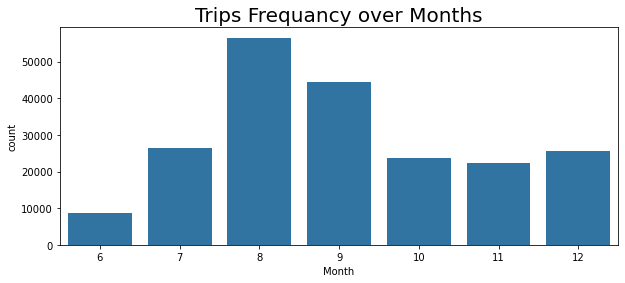

In [8]:
#month investigation

#to catigorical
m = np.arange(6,13) 
mnth = pd.api.types.CategoricalDtype(categories= m, ordered= True)
df.month = df.strat_day_time.astype(mnth)

#ploting
plt.figure(figsize =(10,4))
sb.countplot(data =df, x = 'month', color =color);
plt.xlabel('Month')
plt.title('Trips Frequancy over Months',size=20);

## (Visualization 7)

> The trip mean duration in minutes that the Customer user_type use greater than the Subscriber user_type.

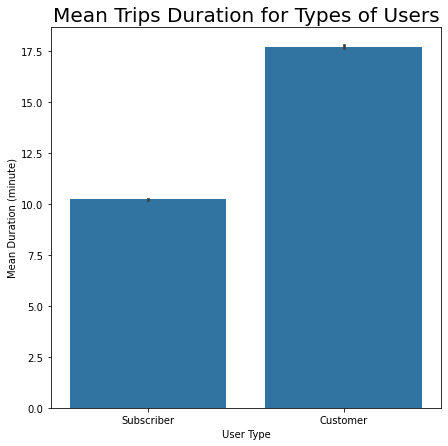

In [9]:
plt.figure(figsize = (7,7))
sb.barplot(data =df,x = 'user_type', y ='duration_mints',color = color);
plt.title('Mean Trips Duration for Types of Users',size = 20);
plt.xlabel('User Type')
plt.ylabel('Mean Duration (minute)');


## (Visualization 8)

> As expected, the greater the distance between the start and the end stations, the greater the mean trip duration time.

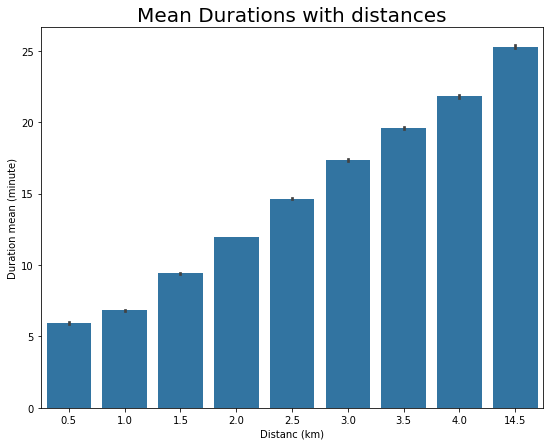

In [10]:
plt.figure(figsize = (9,7))
sb.barplot(data =df,x = 'distance', y ='duration_mints',color = color);
plt.title('Mean Durations with distances',size =20)
plt.xlabel('Distanc (km)')
plt.ylabel('Duration mean (minute)');

## (Visualization 9)

>User Type number of trips over The Weekday <br> 
The subscribers are more than the Customers regardless of the weekday, but the weekend is the highest day for both. we can notice also that the number of customers on the first day of the week is close to the number of customers on the weekend when the subscribers’ number decreased by order of magnitude!

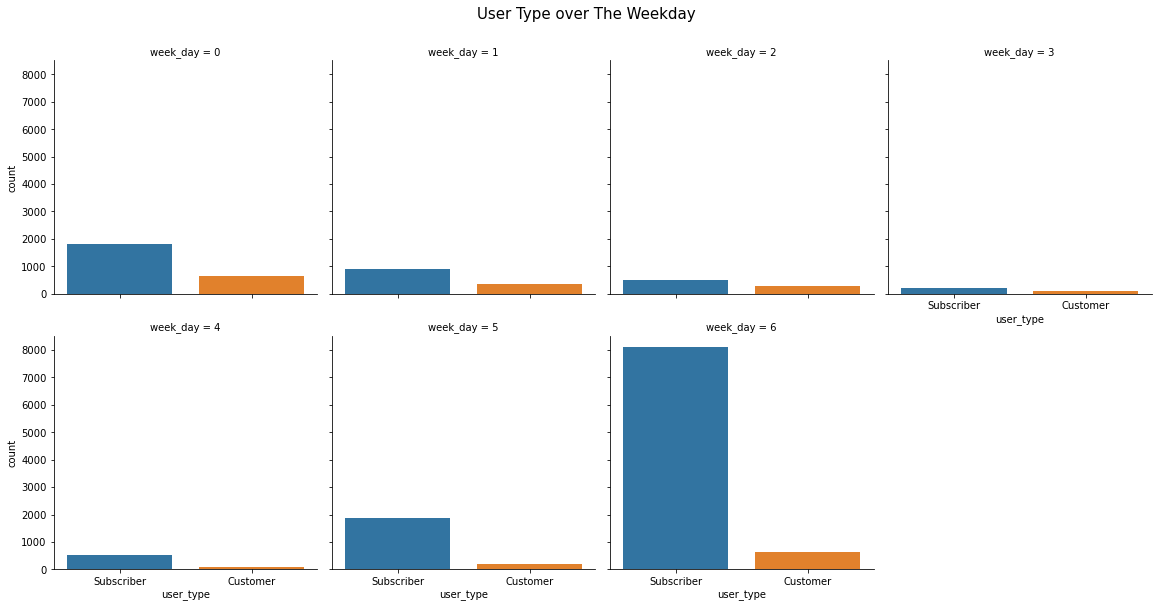

In [11]:
# investigating the day of week and the type of user.
g =sb.catplot("user_type", col="week_day" , data=df,kind="count", height=4, aspect=1, col_wrap=4)
g.fig.suptitle('User Type over The Weekday' ,  y =1.05 , size = 15);


## (Visualization 10)

>How does the type of the users affect the trip duration over the weekdays?
- In most of the days the trip duration time of the subscribers is short compared to the customers'.
- Except on the first day of the week, more subscribers take more time. and more Customers take shorter time.

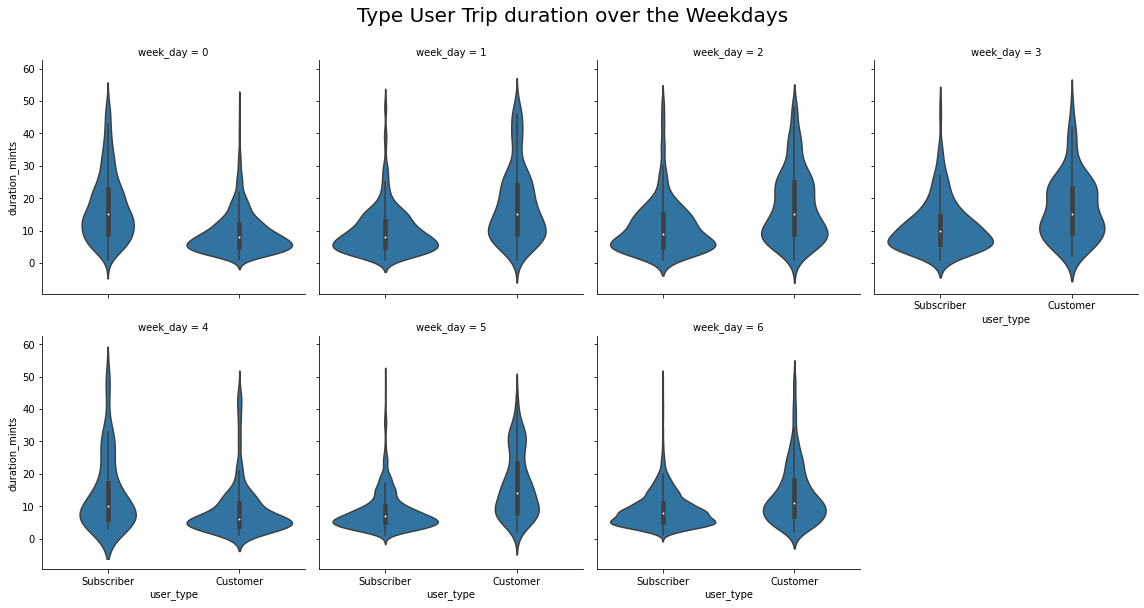

In [12]:
#week day, duration, user type
g = sb.FacetGrid(data =df, col ='week_day',col_wrap=4,size = 4)
g.map(sb.violinplot, 'user_type', 'duration_mints');
g.fig.suptitle('Type User Trip duration over the Weekdays', size =20, y=1.05);

## Thanks!